* 【はじめての画像分類】Google ColabでEfficientNetV2を使って画像分類 より
* https://tt-tsukumochi.com/archives/665

In [1]:
test_dir = '/content/tmp'
!mkdir $test_dir
%cd $test_dir

/content/tmp


In [2]:
import itertools
import os
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print('TF version:', tf.__version__)
print('Hub version:', hub.__version__)
print('Phsical devices:', tf.config.list_physical_devices())

def get_hub_url_and_isize(model_name, ckpt_type, hub_type):

  ckpt_type = '-' + ckpt_type
  hub_url_map = {
    'efficientnetv2-xl-21k-ft1k':  f'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-xl-21k-ft1k/{hub_type}',
  }
  image_size_map = {
    'efficientnetv2-xl':  512,
  }
  hub_url = hub_url_map.get(model_name + ckpt_type)
  image_size = image_size_map.get(model_name, 224)
  return hub_url, image_size

def get_imagenet_labels(filename):
  labels = []
  with open(filename, 'r') as f:
    for line in f:
      labels.append(line.split('\t')[1][:-1])  # split and remove line break.
  return labels

TF version: 2.9.2
Hub version: 0.12.0
Phsical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import tensorflow_hub as hub
model_name = 'efficientnetv2-xl' 
ckpt_type = '21k-ft1k' 
hub_type = 'classification' 
hub_url, image_size = get_hub_url_and_isize(model_name, ckpt_type, hub_type)
tf.keras.backend.clear_session()
m = hub.KerasLayer(hub_url, trainable=False)
m.build([None, 224, 224, 3])  # Batch input shape.


labels_map = '/tmp/imagenet1k_labels.txt'
image_file = '/tmp/panda.jpg'
tf.keras.utils.get_file(image_file, 'https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG')
tf.keras.utils.get_file(labels_map, 'https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/v2/imagenet1k_labels.txt')

31677/31677 [==============================] - 0s 0us/step


'/tmp/imagenet1k_labels.txt'

top 1 (36.6%):  giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca 
top 2 (0.6%):  American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier 
top 3 (0.5%):  French bulldog 
top 4 (0.5%):  Staffordshire bullterrier, Staffordshire bull terrier 
top 5 (0.4%):  Irish terrier 


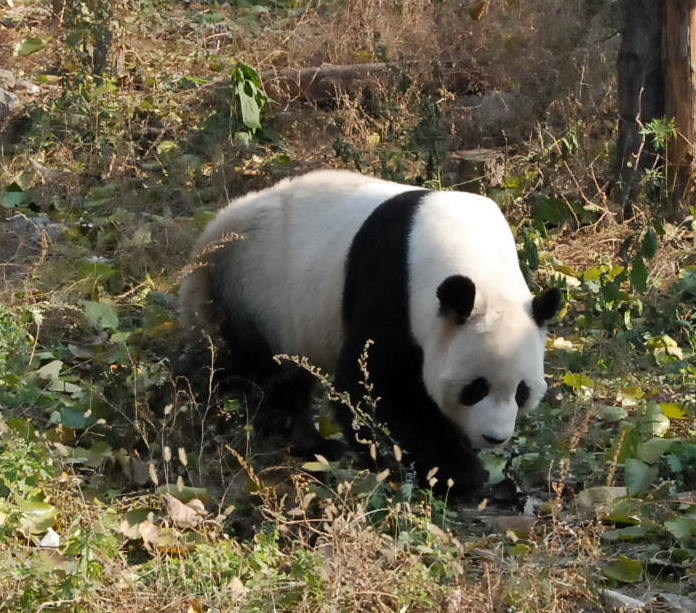

In [4]:
image = tf.keras.preprocessing.image.load_img(image_file, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = (image - 128.) / 128.
logits = m(tf.expand_dims(image, 0), False)


pred = tf.keras.layers.Softmax()(logits)
idx = tf.argsort(logits[0])[::-1][:5].numpy()
classes = get_imagenet_labels(labels_map)
for i, id in enumerate(idx):
  print(f'top {i+1} ({pred[0][id]*100:.1f}%):  {classes[id]} ')
from IPython import display
display.display(display.Image(image_file))

In [5]:
# Google colab でファイルを自分のPCからファイルをアップローとする場合、下のコメント部分の#を削除する
from google.colab import files
uploaded = files.upload()
!ls

Saving squirrel_cls.jpg to squirrel_cls.jpg
squirrel_cls.jpg


top 1 (40.7%):  fox squirrel, eastern fox squirrel, Sciurus niger 
top 2 (0.6%):  acorn 
top 3 (0.6%):  Shih-Tzu 
top 4 (0.5%):  Italian greyhound 
top 5 (0.5%):  ear, spike, capitulum 


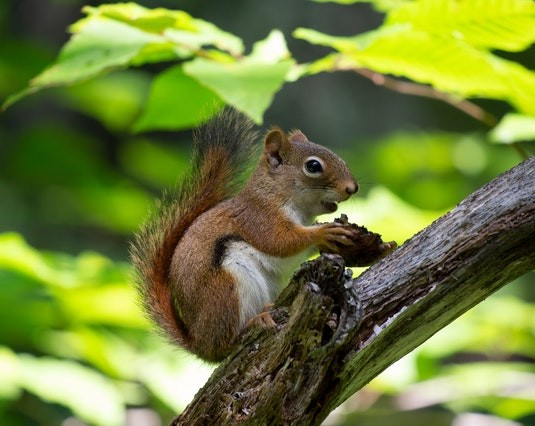

In [6]:
image_file = 'squirrel_cls.jpg'
image = tf.keras.preprocessing.image.load_img(image_file, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = (image - 128.) / 128.
logits = m(tf.expand_dims(image, 0), False)


pred = tf.keras.layers.Softmax()(logits)
idx = tf.argsort(logits[0])[::-1][:5].numpy()
classes = get_imagenet_labels(labels_map)
for i, id in enumerate(idx):
  print(f'top {i+1} ({pred[0][id]*100:.1f}%):  {classes[id]} ')
from IPython import display
display.display(display.Image(image_file))